In [69]:
import pandas as pd

In [70]:
x_train = X_train = pd.read_csv("C:\\Users\\sivan\\Projects\\real-time-fraud-system\\data\\processed\\X_train.csv")
X_test  = pd.read_csv("C:\\Users\\sivan\\Projects\\real-time-fraud-system\\data\\processed\\X_test.csv")
y_train = pd.read_csv("C:\\Users\\sivan\\Projects\\real-time-fraud-system\\data\\processed\\y_train.csv").values.ravel()
y_test  = pd.read_csv("C:\\Users\\sivan\\Projects\\real-time-fraud-system\\data\\processed\\y_test.csv").values.ravel()


In [71]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    solver='liblinear',
    random_state=42
)

model.fit(x_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

In [72]:
y_train_proba = model.predict_proba(X_train)[:, 1]
y_test_proba  = model.predict_proba(X_test)[:, 1]


In [73]:
y_train_proba

array([0.0061346 , 0.01918415, 0.00487914, ..., 0.11724123, 0.010149  ,
       0.02894237])

In [74]:
y_test_proba

array([6.42870968e-03, 5.37709071e-02, 2.78413500e-05, ...,
       4.85153140e-04, 6.79943849e-03, 7.48404194e-02])

In [75]:
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_test,y_test_proba)
roc

0.9717614817452023

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [77]:
FPR,TPR,Thresholds = roc_curve(y_test,y_test_proba)

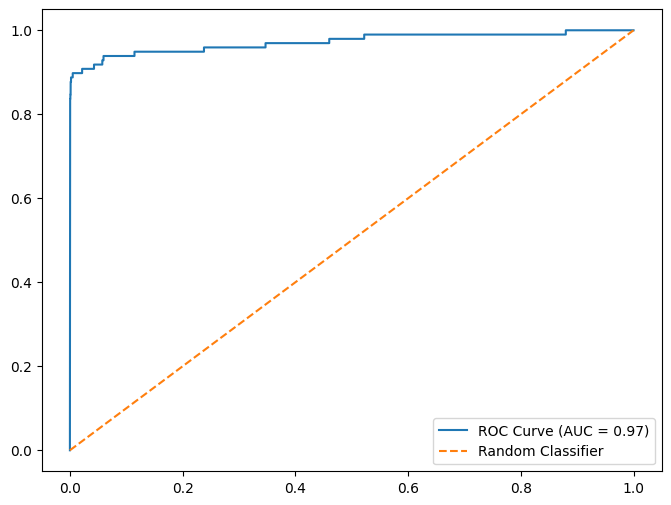

In [78]:
plt.figure(figsize = (8,6))
plt.plot(FPR,TPR,label = f"ROC Curve (AUC = {roc:.2f})")
plt.plot([0,1], [0,1], linestyle='--', label='Random Classifier')
plt.legend()
plt.show()

In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_test, (y_test_proba>=0.99999993).astype(int)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



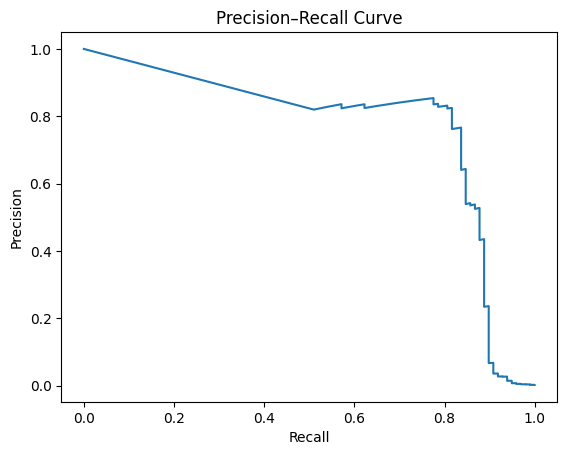

In [80]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()


In [81]:
import joblib
joblib.dump(model, "C:\\Users\\sivan\\Projects\\real-time-fraud-system\\model\\fraud_logistic_model.pkl")


['C:\\Users\\sivan\\Projects\\real-time-fraud-system\\model\\fraud_logistic_model.pkl']